## Αποτέλεσμα εφαρμογής διαφορετικών τύπων padding (using Gaussian Filter)

This example shows how different padding techniques work in test images and specifically (a) zero padding, (b) reflect (c) edge padding

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow #this is used for imshow to work on google colab

In [2]:

def apply_gaussian_filter_with_padding(image, kernel_size=(5,5), sigma=1.0, padding_mode='zero'):
    """
    Apply Gaussian filter with different padding methods

    Parameters:
    image: Input image
    kernel_size: Size of the Gaussian kernel (height, width)
    sigma: Standard deviation of the Gaussian kernel
    padding_mode: 'zero', 'reflect', or 'edge'
    """
    # Calculate padding size
    pad_h = kernel_size[0] // 2
    pad_w = kernel_size[1] // 2

    # Apply padding based on the specified mode
    if padding_mode == 'zero':
        padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    elif padding_mode == 'reflect':
        padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    elif padding_mode == 'edge':
        padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')

    # Apply Gaussian filter
    filtered = cv2.GaussianBlur(padded, kernel_size, sigma)

    # Remove padding to get back to original size
    h, w = image.shape
    filtered = filtered[pad_h:pad_h+h, pad_w:pad_w+w]

    return filtered

def create_test_image(size=(200, 200)):
    """
    Create a test image with patterns that will clearly show padding effects
    """
    image = np.ones(size) * 255  # White background

    # Add a gradient from left to right
    x = np.linspace(0, 1, size[1])
    gradient = np.tile(x, (size[0], 1))

    # Add some patterns
    x, y = np.meshgrid(np.linspace(0, size[0]-1, size[0]),
                       np.linspace(0, size[1]-1, size[1]))
    pattern = np.sin(x/10) * np.cos(y/10) * 50

    # Combine patterns
    image = gradient * 255 * 0.5 + pattern + 100
    image = np.clip(image, 0, 255).astype(np.uint8)

    return image

def visualize_results(original, results, titles):
    """
    Display the original image and filtered results side by side
    """
    plt.figure(figsize=(20, 5))

    # Plot original
    plt.subplot(141)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot results
    for i, (result, title) in enumerate(zip(results, titles), start=2):
        plt.subplot(1, 4, i)
        plt.imshow(result, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    return plt



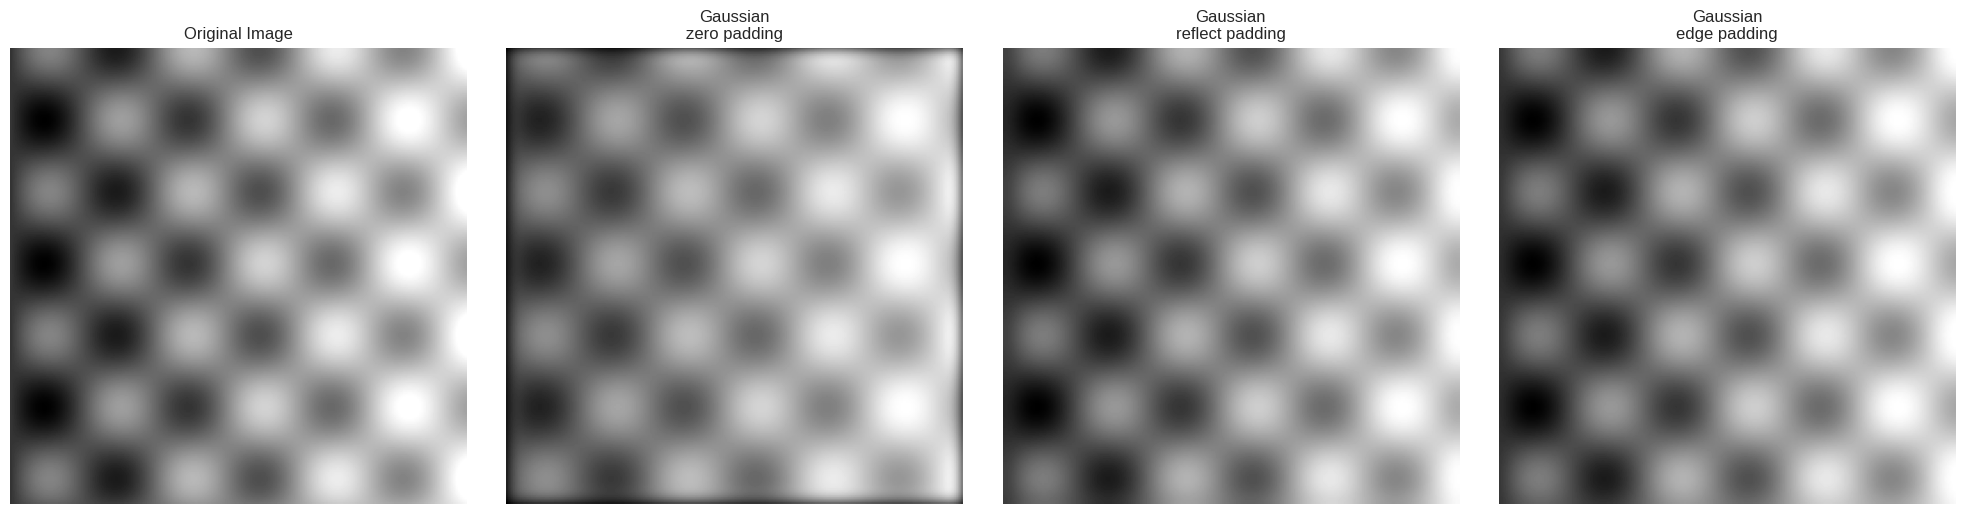

In [3]:
# Create test image
test_image = create_test_image()

# Apply Gaussian filter with different padding methods
kernel_size = (15, 15)  # Large kernel to make the effect more visible
sigma = 3.0

results = []
titles = []
padding_modes = ['zero', 'reflect', 'edge']

for mode in padding_modes:
    filtered = apply_gaussian_filter_with_padding(
        test_image,
        kernel_size=kernel_size,
        sigma=sigma,
        padding_mode=mode
    )
    results.append(filtered)
    titles.append(f'Gaussian\n{mode} padding')

# Visualize results
plt.style.use('seaborn-v0_8-dark')
visualize_results(test_image, results, titles)
plt.show()



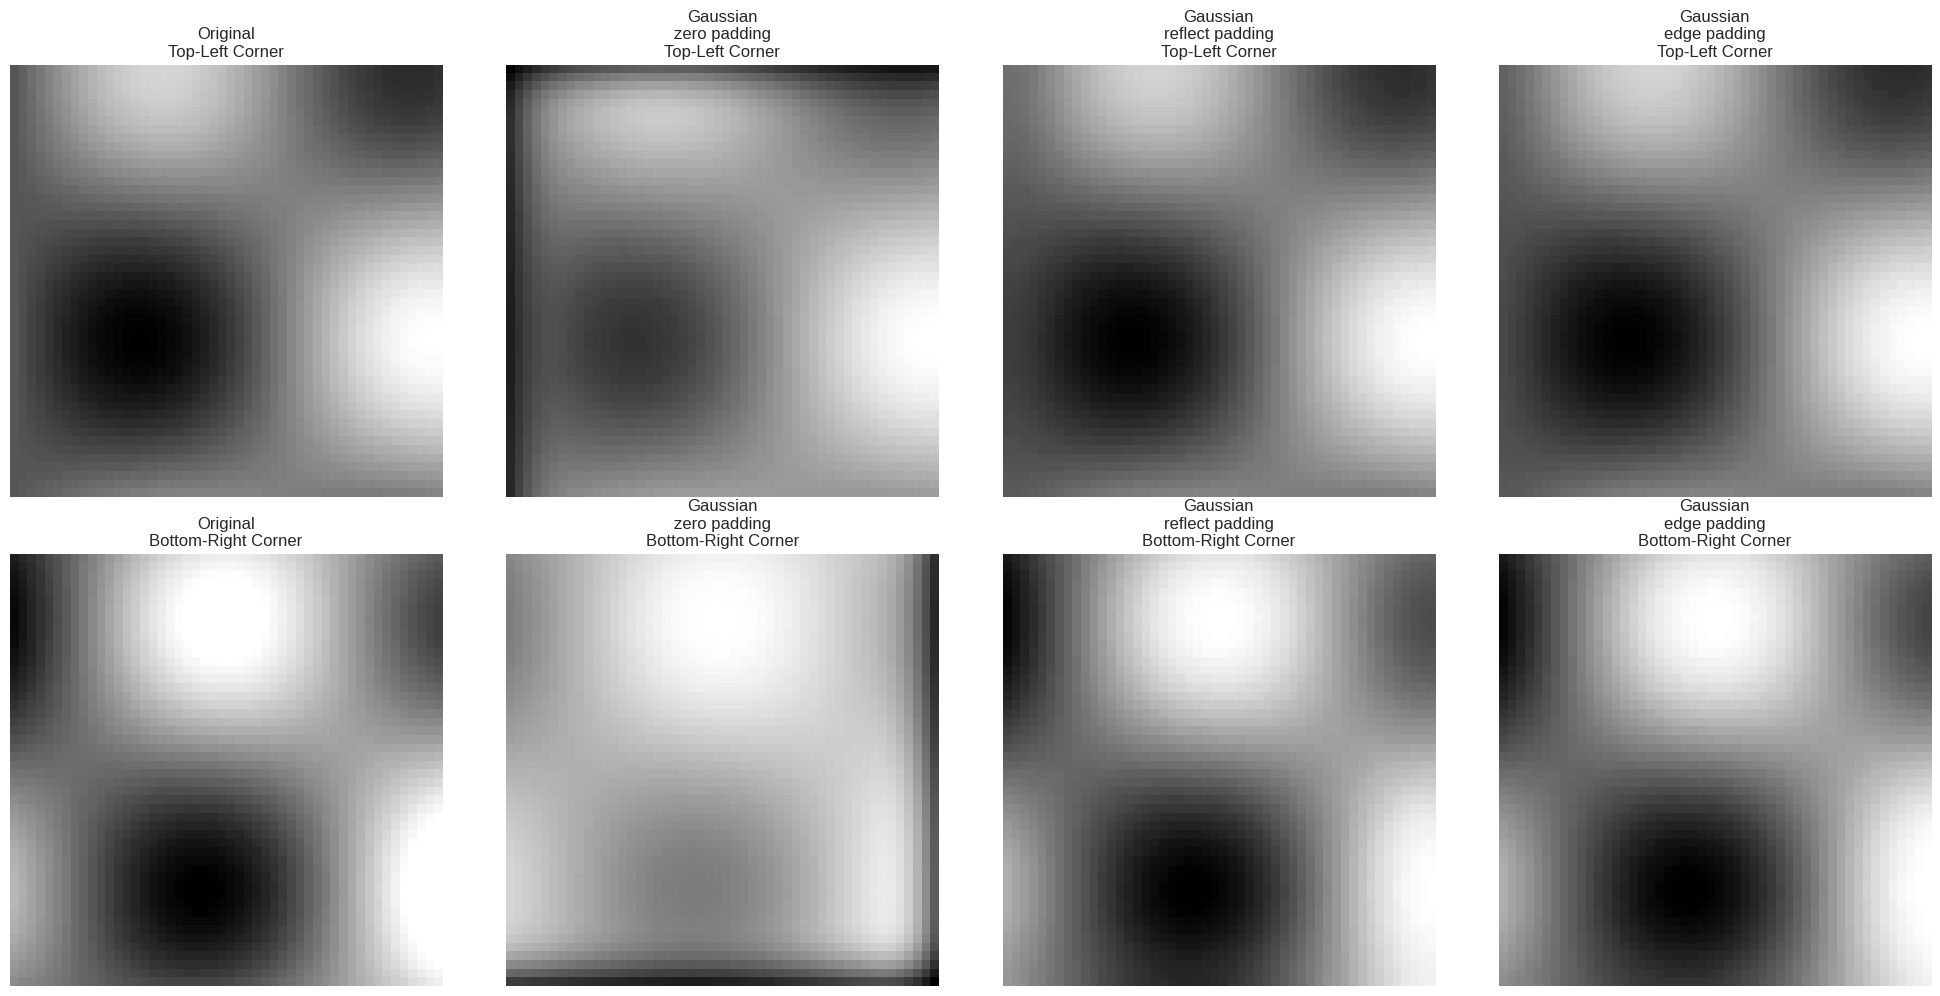

In [4]:
# Show zoomed border regions to better see the padding effects
def show_border_comparison(original, results, titles, region_size=50):
    """
    Show zoomed views of the border regions
    """
    plt.figure(figsize=(20, 10))

    # Top-left corner
    for i, (img, title) in enumerate(zip([original] + results, ['Original'] + titles)):
        plt.subplot(2, 4, i+1)
        plt.imshow(img[:region_size, :region_size], cmap='gray')
        plt.title(f'{title}\nTop-Left Corner')
        plt.axis('off')

    # Bottom-right corner
    for i, (img, title) in enumerate(zip([original] + results, ['Original'] + titles)):
        plt.subplot(2, 4, i+5)
        plt.imshow(img[-region_size:, -region_size:], cmap='gray')
        plt.title(f'{title}\nBottom-Right Corner')
        plt.axis('off')

    plt.tight_layout()
    return plt

show_border_comparison(test_image, results, titles)
plt.show()